<a href="https://colab.research.google.com/github/AlicanGunenc/nyc-rolling-sales/blob/main/nyc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.graph_objs as go
import plotly.offline as py
import seaborn as sns
from IPython.display import display, Image
from collections import Counter
import plotly.express as px
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')

import matplotlib.style as style
style.use('fivethirtyeight')
import time

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import lightgbm

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("nyc-rolling-sales.csv")

In [3]:
#how many rows and columns?
print(df.shape)

#print first five rows
df.head()

(84548, 22)


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [4]:
#general summary of dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,84548.0,10344.359878,7151.779436,4.0,4231.00,8942.0,15987.25,26739.0
BOROUGH,84548.0,2.998758,1.289790,1.0,2.00,3.0,4.00,5.0
BLOCK,84548.0,4237.218976,3568.263407,1.0,1322.75,3311.0,6281.00,16322.0
LOT,84548.0,376.224015,658.136814,1.0,22.00,50.0,1001.00,9106.0
ZIP CODE,84548.0,10731.991614,1290.879147,0.0,10305.00,11209.0,11357.00,11694.0
RESIDENTIAL UNITS,84548.0,2.025264,16.721037,0.0,0.00,1.0,2.00,1844.0
COMMERCIAL UNITS,84548.0,0.193559,8.713183,0.0,0.00,0.0,0.00,2261.0
TOTAL UNITS,84548.0,2.249184,18.972584,0.0,1.00,1.0,2.00,2261.0
YEAR BUILT,84548.0,1789.322976,537.344993,0.0,1920.00,1940.0,1965.00,2017.0
TAX CLASS AT TIME OF SALE,84548.0,1.657485,0.819341,1.0,1.00,2.0,2.00,4.0


Some Data Cleaning

In [5]:
#drop unnecessary column
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [6]:
#types of data for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   EASE-MENT                       84548 non-null  object
 7   BUILDING CLASS AT PRESENT       84548 non-null  object
 8   ADDRESS                         84548 non-null  object
 9   APARTMENT NUMBER                84548 non-null  object
 10  ZIP CODE                        84548 non-null  int64 
 11  RESIDENTIAL UNITS               84548 non-null  int64 
 12  COMMERCIAL UNITS                84548 non-null

Converting Datatype Variables
I will need to convert the datatypes for the above datatypes to their appropriate classification. Some columns such as SALE PRICE is considered an object when it should be an float. And other columns such as NEIGHBORHOOD should be a categorical datatype rather than an object.

This dataset only contains object and integer dtypes.

In [7]:
# Identify object columns
print(df.select_dtypes(['object']).columns)

Index(['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT',
       'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET',
       'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE', 'SALE DATE'],
      dtype='object')


In [8]:
# Identify integer columns
print(df.select_dtypes(['int64']).columns)

Index(['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS',
       'COMMERCIAL UNITS', 'TOTAL UNITS', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE'],
      dtype='object')


In [9]:
# Convert objects to categorical variables
obj_cats = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT',
       'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'BUILDING CLASS AT TIME OF SALE']

for colname in obj_cats:
    df[colname] = df[colname].astype('category')

In [10]:
# Convert numeric to categorical variables
num_cats = ['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE',
            'TAX CLASS AT TIME OF SALE']

for colname in num_cats:
    df[colname] = df[colname].astype('category')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         84548 non-null  category
 1   NEIGHBORHOOD                    84548 non-null  category
 2   BUILDING CLASS CATEGORY         84548 non-null  category
 3   TAX CLASS AT PRESENT            84548 non-null  category
 4   BLOCK                           84548 non-null  category
 5   LOT                             84548 non-null  category
 6   EASE-MENT                       84548 non-null  category
 7   BUILDING CLASS AT PRESENT       84548 non-null  category
 8   ADDRESS                         84548 non-null  category
 9   APARTMENT NUMBER                84548 non-null  category
 10  ZIP CODE                        84548 non-null  category
 11  RESIDENTIAL UNITS               84548 non-null  int64   
 12  COMMERCIAL UNITS  

In [12]:
#getting an error where I cannot convert the object types into integers using astype function
#convert object type to integer using pd.to_numeric & set errors to 'coerce'; ie. changes to NaN

numer = ['LAND SQUARE FEET','GROSS SQUARE FEET', 'SALE PRICE']
for col in numer: # coerce for missing values
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [13]:
# Convert to date object
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])

In [14]:
#check dataframe
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17


In [15]:
#check dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  category      
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  category      
 5   LOT                             84548 non-null  category      
 6   EASE-MENT                       84548 non-null  category      
 7   BUILDING CLASS AT PRESENT       84548 non-null  category      
 8   ADDRESS                         84548 non-null  category      
 9   APARTMENT NUMBER                84548 non-null  category      
 10  ZIP CODE                        84548 non-null  category      
 11  RE

Renaming and further organization of the dataset to make my life easier!

In [16]:
# remove space and add _ character for ease of processing
df.columns = df.columns.str.replace(' ', '_')

In [17]:
#make column names lowercase for ease of readability and further processing
df.columns= df.columns.str.lower()
df.columns

Index(['borough', 'neighborhood', 'building_class_category',
       'tax_class_at_present', 'block', 'lot', 'ease-ment',
       'building_class_at_present', 'address', 'apartment_number', 'zip_code',
       'residential_units', 'commercial_units', 'total_units',
       'land_square_feet', 'gross_square_feet', 'year_built',
       'tax_class_at_time_of_sale', 'building_class_at_time_of_sale',
       'sale_price', 'sale_date'],
      dtype='object')

In [18]:
#create a new column for age of the unit
df['age'] = 2024 - df['year_built']


In [19]:
#set numerical indicators for boroughs as type str to distinguish boroughs
df['borough'] = df['borough'].astype(str)
df['borough'] = df['borough'].str.replace("1", "Manhattan")
df['borough'] = df['borough'].str.replace("2", "Bronx")
df['borough'] = df['borough'].str.replace("3", "Brooklyn")
df['borough'] = df['borough'].str.replace("4", "Queens")
df['borough'] = df['borough'].str.replace("5", "Staten Island")

Missing Values
Time to check the number of missing values in this dataset.

In [20]:
# Count of missing values
df.isnull().sum()

borough                               0
neighborhood                          0
building_class_category               0
tax_class_at_present                  0
block                                 0
lot                                   0
ease-ment                             0
building_class_at_present             0
address                               0
apartment_number                      0
zip_code                              0
residential_units                     0
commercial_units                      0
total_units                           0
land_square_feet                  26252
gross_square_feet                 27612
year_built                            0
tax_class_at_time_of_sale             0
building_class_at_time_of_sale        0
sale_price                        14561
sale_date                             0
age                                   0
dtype: int64

In [21]:
# Percentage of missing values
df.isnull().sum()/len(df)*100

borough                            0.000000
neighborhood                       0.000000
building_class_category            0.000000
tax_class_at_present               0.000000
block                              0.000000
lot                                0.000000
ease-ment                          0.000000
building_class_at_present          0.000000
address                            0.000000
apartment_number                   0.000000
zip_code                           0.000000
residential_units                  0.000000
commercial_units                   0.000000
total_units                        0.000000
land_square_feet                  31.049818
gross_square_feet                 32.658372
year_built                         0.000000
tax_class_at_time_of_sale          0.000000
building_class_at_time_of_sale     0.000000
sale_price                        17.222170
sale_date                          0.000000
age                                0.000000
dtype: float64

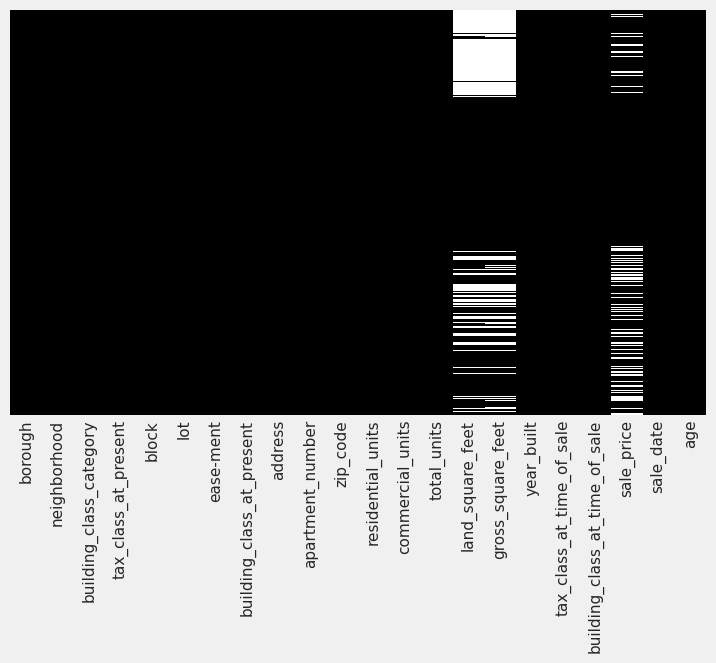

In [22]:
# Visualize missing values
fig, ax = plt.subplots(figsize=(8,5))
sns.set(font_scale=1)
sns.heatmap(df.isnull(),yticklabels = False, cbar = False, cmap = 'Greys_r')
plt.show()

In [23]:
# Remove rows missing data
df = df.dropna()

In [24]:
# Recheck the count of missing values
df.isnull().sum()

borough                           0
neighborhood                      0
building_class_category           0
tax_class_at_present              0
block                             0
lot                               0
ease-ment                         0
building_class_at_present         0
address                           0
apartment_number                  0
zip_code                          0
residential_units                 0
commercial_units                  0
total_units                       0
land_square_feet                  0
gross_square_feet                 0
year_built                        0
tax_class_at_time_of_sale         0
building_class_at_time_of_sale    0
sale_price                        0
sale_date                         0
age                               0
dtype: int64

In [25]:
#convert from scientific notation to describe dataset
df.describe().apply(lambda s: s.apply('{0:.5f}'.format)).transpose()

,count,mean,std,min,25%,50%,75%,max
residential_units,48244.00000,2.56654,17.46548,0.00000,1.00000,1.00000,2.00000,1844.00000
commercial_units,48244.00000,0.24917,10.98807,0.00000,0.00000,0.00000,0.00000,2261.00000
total_units,48244.00000,2.83463,20.75042,0.00000,1.00000,1.00000,2.00000,2261.00000
land_square_feet,48244.00000,3358.11655,31435.89670,0.00000,1413.00000,2140.00000,3071.00000,4228300.00000
gross_square_feet,48244.00000,3669.75253,29474.91185,0.00000,828.00000,1620.00000,2520.00000,3750565.00000
year_built,48244.00000,1827.76517,464.36115,0.00000,1920.00000,1931.00000,1961.00000,2017.00000
sale_price,48244.00000,1153281.44582,13401309.19358,0.00000,80420.00000,480000.00000,830000.00000,2210000000.00000
age,48244.00000,196.23483,464.36115,7.00000,63.00000,93.00000,104.00000,2024.00000


There are minimum values of zero for columns that do not make sense. For example, year built has a minimum value of 0.

In [26]:
#check dataframe where year_built is 0 years
df[df['year_built']==0]

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age
18364,Bronx,BATHGATE,29 COMMERCIAL GARAGES,4,2918,29,,G7,1885 BATHGATE AVENUE,,...,0,0,3070.0,0.0,0,4,G7,2500000.0,2016-12-15,2024
18371,Bronx,BATHGATE,31 COMMERCIAL VACANT LAND,4,3028,13,,V9,1996 WEBSTER AVENUE,,...,0,0,5945.0,0.0,0,4,V9,1200000.0,2016-10-19,2024
18373,Bronx,BATHGATE,41 TAX CLASS 4 - OTHER,4,2900,1,,Z9,1816 WEBSTER AVENUE,,...,0,0,3082.0,0.0,0,4,Z9,300000.0,2016-11-03,2024
18756,Bronx,BAYCHESTER,05 TAX CLASS 1 VACANT LAND,1B,4725,26,,V0,1475 HICKS STREET,,...,0,0,2375.0,0.0,0,1,V0,98000.0,2016-10-31,2024
18757,Bronx,BAYCHESTER,05 TAX CLASS 1 VACANT LAND,1B,4726,38,,V0,3552 EASTCHESTER ROAD,,...,0,0,3400.0,0.0,0,1,V0,0.0,2017-03-16,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53841,Queens,CORONA,07 RENTALS - WALKUP APARTMENTS,2B,1785,22,,C1,112-48 38TH AVENUE,,...,0,8,2500.0,6875.0,0,2,C1,2153222.0,2017-05-10,2024
54054,Queens,CORONA,41 TAX CLASS 4 - OTHER,4,1961,1,,Z9,5506 VAN CLEEF STREET,,...,0,0,926.0,384.0,0,4,Z9,113000.0,2017-08-09,2024
57321,Queens,FLUSHING-NORTH,08 RENTALS - ELEVATOR APARTMENTS,2B,5186,56,,D3,142-11 CHERRY AVENUE,,...,0,10,2850.0,10111.0,0,2,D3,4000000.0,2017-05-19,2024
65906,Queens,LITTLE NECK,01 ONE FAMILY DWELLINGS,1,8229,80,,A3,45-39 BROWVALE LANE,,...,0,1,9562.0,5291.0,0,1,A3,1731025.0,2017-04-06,2024


In [27]:
#check how many cases where year_built is less than 1
zero = df[df['year_built']==0] #create variable called zero with condition where year_built less than 1
count = zero.count() #count the cases of less than 1

print(count)

borough                           2911
neighborhood                      2911
building_class_category           2911
tax_class_at_present              2911
block                             2911
lot                               2911
ease-ment                         2911
building_class_at_present         2911
address                           2911
apartment_number                  2911
zip_code                          2911
residential_units                 2911
commercial_units                  2911
total_units                       2911
land_square_feet                  2911
gross_square_feet                 2911
year_built                        2911
tax_class_at_time_of_sale         2911
building_class_at_time_of_sale    2911
sale_price                        2911
sale_date                         2911
age                               2911
dtype: int64


In [28]:
#remove rows where year_built = 0
df = df[df['year_built']!=0]

In [29]:
df

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,124
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,111
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,124
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,...,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,104
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,...,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,...,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28,26
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,...,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21,26
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,...,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05,99
84546,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,...,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21,23


Outliers
Similarly, lets check other values where land and gross square feet is zero as these may be potential outliers

In [30]:
df[df['land_square_feet']==0]

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age
18354,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,,D4,"463 EAST 178TH STREET, 6E",,...,0,0,0.0,0.0,1935,2,D4,40000.0,2017-04-17,89
18355,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,,D4,"463 EAST 178TH ST, 6B",,...,0,0,0.0,0.0,1935,2,D4,40000.0,2017-04-17,89
18356,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3044,40,,D4,"495 E 178TH STREET, 2H",,...,0,0,0.0,0.0,1941,2,D4,60000.0,2016-12-01,83
18746,Bronx,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4795,1009,,R3,2877 ELY AVENUE,3,...,0,1,0.0,0.0,2008,1,R3,310000.0,2017-02-28,16
18747,Bronx,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4795,1027,,R3,2853 ELY AVENUE,3,...,0,1,0.0,0.0,2008,1,R3,342500.0,2017-07-31,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49292,Brooklyn,WINDSOR TERRACE,44 CONDO PARKING,4,5287,1035,,RP,207 PROSPECT PARK SW,P35,...,0,1,0.0,0.0,1990,4,RP,0.0,2017-07-25,34
49293,Brooklyn,WINDSOR TERRACE,44 CONDO PARKING,4,5287,1035,,RP,207 PROSPECT PARK SW,P35,...,0,1,0.0,0.0,1990,4,RP,0.0,2017-07-17,34
49294,Brooklyn,WINDSOR TERRACE,47 CONDO NON-BUSINESS STORAGE,4,895,1213,,RS,11 TERRACE PLACE,S2,...,0,1,0.0,0.0,2006,4,RS,0.0,2016-10-06,18
49295,Brooklyn,WINDSOR TERRACE,47 CONDO NON-BUSINESS STORAGE,4,895,1219,,RS,11 TERRACE PLACE,S8,...,0,1,0.0,0.0,2006,4,RS,0.0,2016-10-24,18


In [31]:
df[df['gross_square_feet']==0]

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age
18354,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,,D4,"463 EAST 178TH STREET, 6E",,...,0,0,0.0,0.0,1935,2,D4,40000.0,2017-04-17,89
18355,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,,D4,"463 EAST 178TH ST, 6B",,...,0,0,0.0,0.0,1935,2,D4,40000.0,2017-04-17,89
18356,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3044,40,,D4,"495 E 178TH STREET, 2H",,...,0,0,0.0,0.0,1941,2,D4,60000.0,2016-12-01,83
18746,Bronx,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4795,1009,,R3,2877 ELY AVENUE,3,...,0,1,0.0,0.0,2008,1,R3,310000.0,2017-02-28,16
18747,Bronx,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4795,1027,,R3,2853 ELY AVENUE,3,...,0,1,0.0,0.0,2008,1,R3,342500.0,2017-07-31,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49292,Brooklyn,WINDSOR TERRACE,44 CONDO PARKING,4,5287,1035,,RP,207 PROSPECT PARK SW,P35,...,0,1,0.0,0.0,1990,4,RP,0.0,2017-07-25,34
49293,Brooklyn,WINDSOR TERRACE,44 CONDO PARKING,4,5287,1035,,RP,207 PROSPECT PARK SW,P35,...,0,1,0.0,0.0,1990,4,RP,0.0,2017-07-17,34
49294,Brooklyn,WINDSOR TERRACE,47 CONDO NON-BUSINESS STORAGE,4,895,1213,,RS,11 TERRACE PLACE,S2,...,0,1,0.0,0.0,2006,4,RS,0.0,2016-10-06,18
49295,Brooklyn,WINDSOR TERRACE,47 CONDO NON-BUSINESS STORAGE,4,895,1219,,RS,11 TERRACE PLACE,S8,...,0,1,0.0,0.0,2006,4,RS,0.0,2016-10-24,18


In [32]:
# Remove outliers of zero gross square feet and land square feet.
df = df[df['land_square_feet']!=0]
df = df[df['gross_square_feet']!=0]

# Confirm removals
df.describe().apply(lambda s: s.apply('{0:.5f}'.format)).transpose()

,count,mean,std,min,25%,50%,75%,max
residential_units,36805.00000,3.18209,19.82145,0.00000,1.00000,2.00000,2.00000,1844.00000
commercial_units,36805.00000,0.32319,12.57908,0.00000,0.00000,0.00000,0.00000,2261.00000
total_units,36805.00000,3.50406,23.60379,0.00000,1.00000,2.00000,2.00000,2261.00000
land_square_feet,36805.00000,4197.33422,35778.41850,200.00000,2000.00000,2500.00000,3800.00000,4228300.00000
gross_square_feet,36805.00000,4790.49126,33637.49347,60.00000,1428.00000,2000.00000,2898.00000,3750565.00000
year_built,36805.00000,1939.07811,30.28128,1800.00000,1920.00000,1930.00000,1955.00000,2017.00000
sale_price,36805.00000,1305840.98310,15185705.88870,0.00000,160000.00000,504237.00000,840000.00000,2210000000.00000
age,36805.00000,84.92189,30.28128,7.00000,69.00000,94.00000,104.00000,224.00000


<Axes: xlabel='age', ylabel='sale_price'>

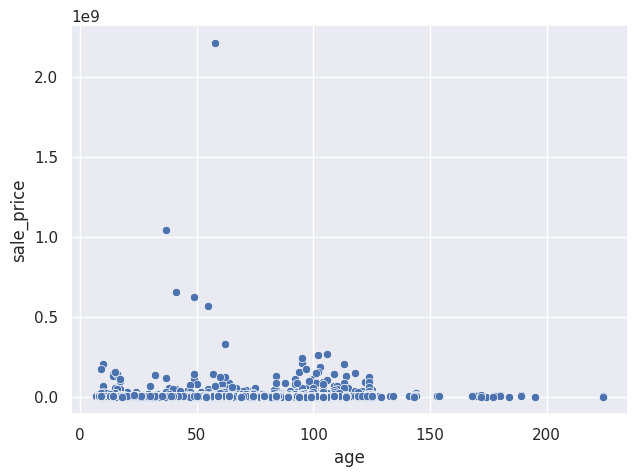

In [33]:
#simple scatter plot to find potential outliers
sns.scatterplot(data=df, x="age", y="sale_price")

In [34]:
#remove outlier prices
df = df[df['sale_price'] <500000000]

<Axes: xlabel='age', ylabel='sale_price'>

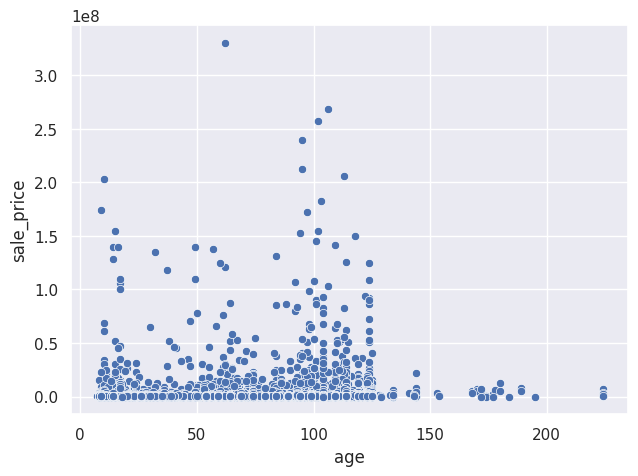

In [35]:
sns.scatterplot(data=df, x="age", y="sale_price")

Exploratory Data Analysis (EDA) & some more cleaning
With the new parameter limiting df prices below $500,000,000, what does the distribution of the data look like?

<Axes: xlabel='sale_price', ylabel='Density'>

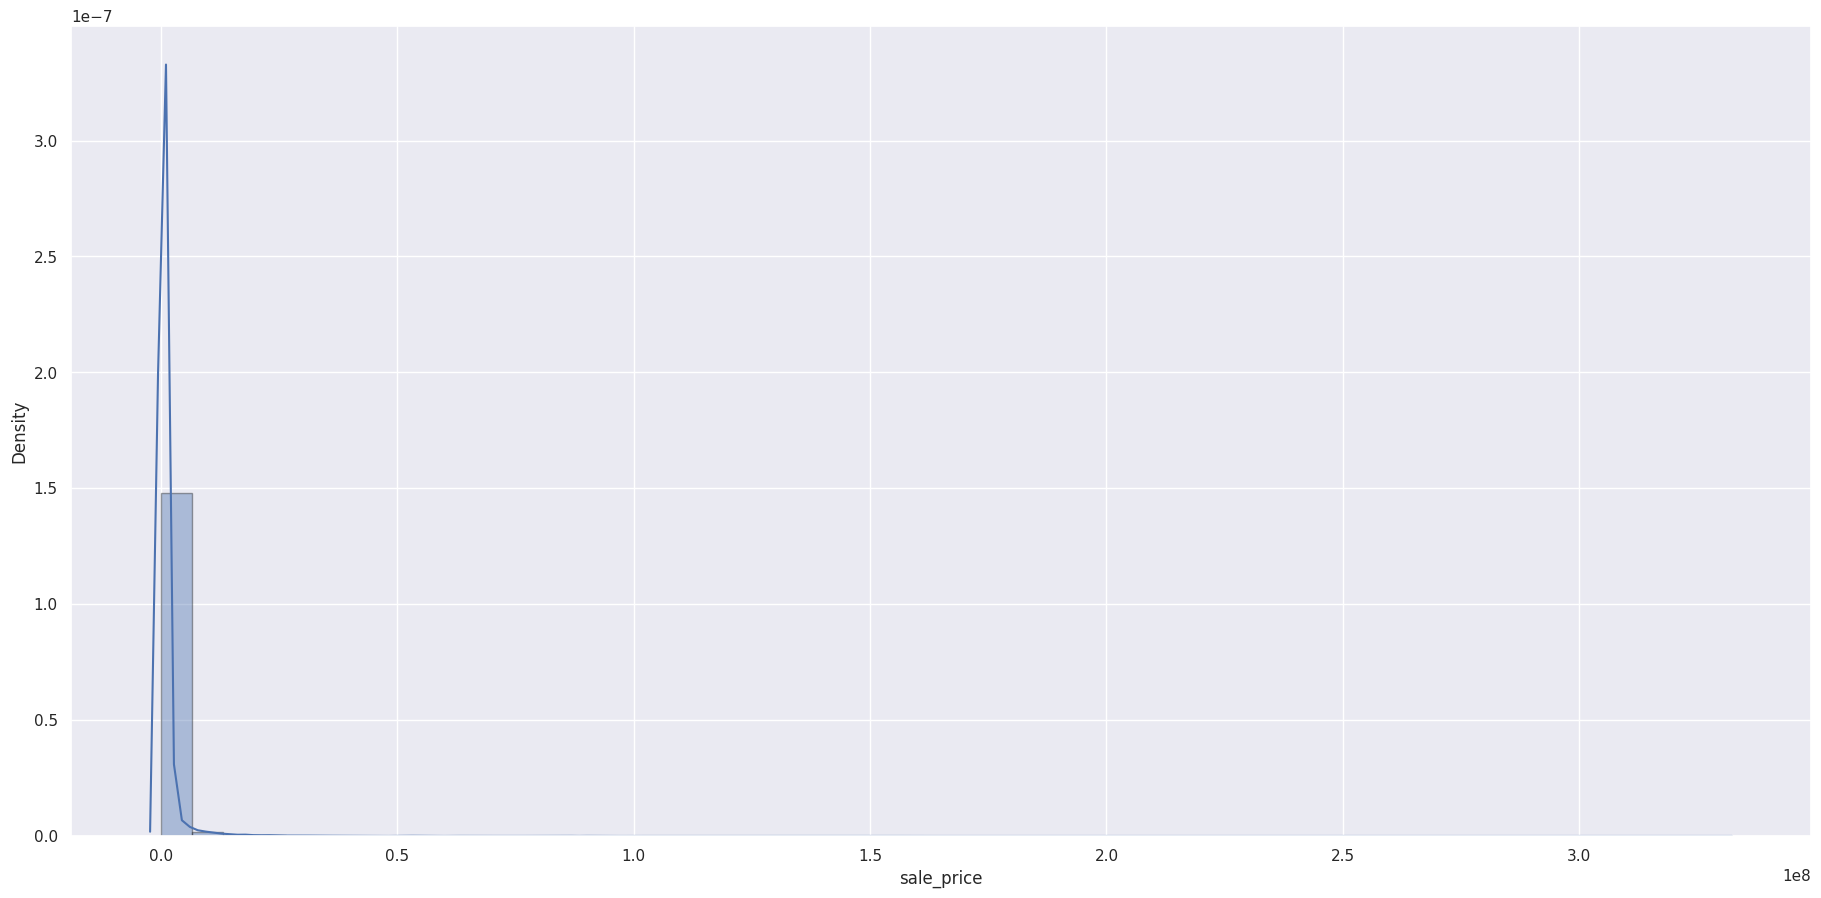

In [36]:
#create distribution plot of df sale prices below $500,000,000
plt.figure(figsize = (20,10))
sns.distplot(df['sale_price'], kde = True, hist_kws=dict(edgecolor="k"))

In [37]:
#create new df where sale_price is below $5 mil.
new_df = df[df['sale_price'] <5000000]

In [38]:
new_house = df[df['sale_price'] <5000000]

In [39]:
new_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35693 entries, 3 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   borough                         35693 non-null  object        
 1   neighborhood                    35693 non-null  category      
 2   building_class_category         35693 non-null  category      
 3   tax_class_at_present            35693 non-null  category      
 4   block                           35693 non-null  category      
 5   lot                             35693 non-null  category      
 6   ease-ment                       35693 non-null  category      
 7   building_class_at_present       35693 non-null  category      
 8   address                         35693 non-null  category      
 9   apartment_number                35693 non-null  category      
 10  zip_code                        35693 non-null  category      
 11  re

In [40]:
new_df.describe().apply(lambda s: s.apply('{0:.5f}'.format)).transpose()


,count,mean,std,min,25%,50%,75%,max
residential_units,35693.00000,2.49181,14.71587,0.00000,1.00000,2.00000,2.00000,1844.00000
commercial_units,35693.00000,0.22439,12.08858,0.00000,0.00000,0.00000,0.00000,2261.00000
total_units,35693.00000,2.71515,19.13044,0.00000,1.00000,2.00000,2.00000,2261.00000
land_square_feet,35693.00000,3787.15518,31837.51462,200.00000,2000.00000,2500.00000,3645.00000,4228300.00000
gross_square_feet,35693.00000,3594.99821,27516.35693,60.00000,1408.00000,1970.00000,2772.00000,3750565.00000
year_built,35693.00000,1939.40375,30.22773,1800.00000,1920.00000,1930.00000,1955.00000,2017.00000
sale_price,35693.00000,605425.59171,657964.67148,0.00000,106500.00000,495000.00000,799000.00000,4975000.00000
age,35693.00000,84.59625,30.22773,7.00000,69.00000,94.00000,104.00000,224.00000


<Axes: xlabel='age', ylabel='sale_price'>

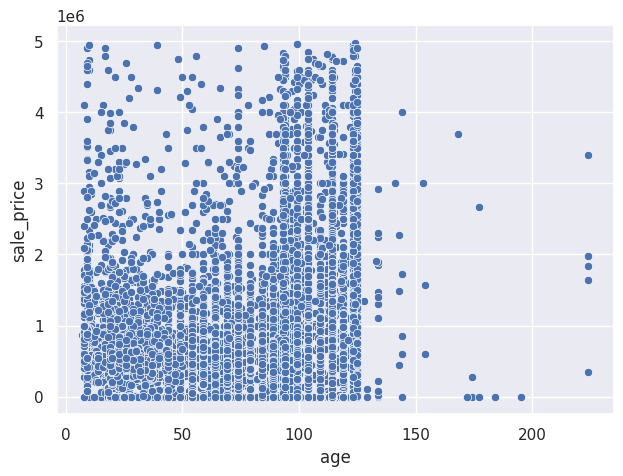

In [41]:
#check again
sns.scatterplot(data=new_df, x="age", y="sale_price")

<Axes: xlabel='sale_price', ylabel='Density'>

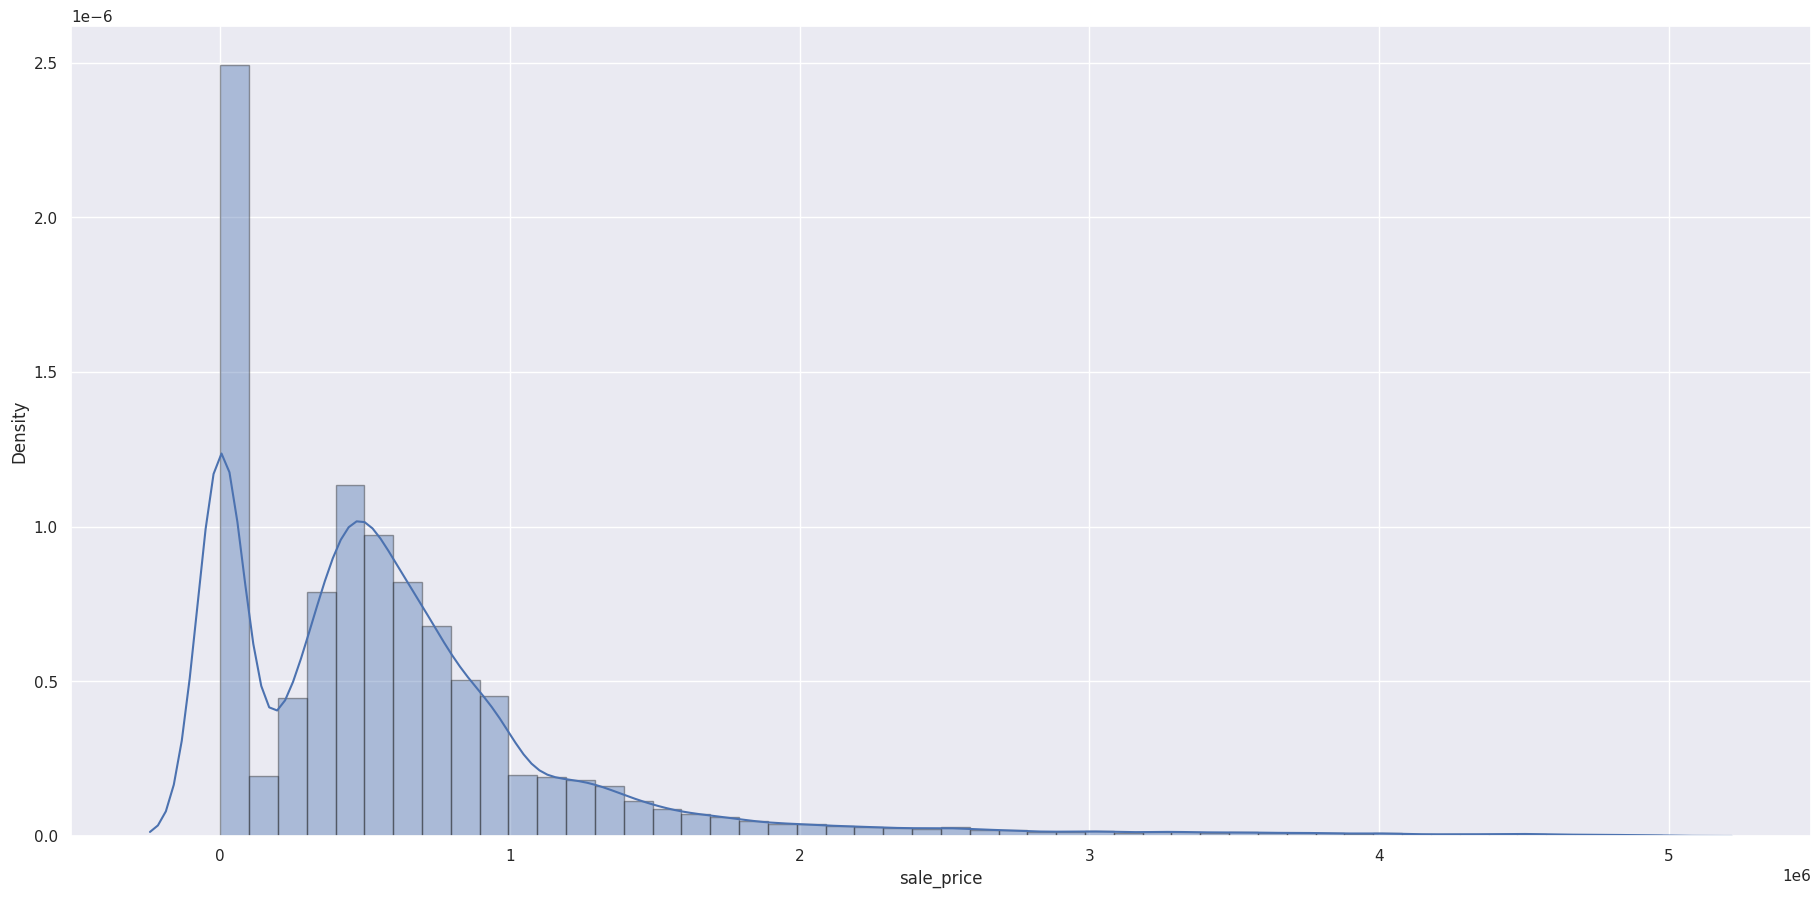

In [42]:
#create distribution plot of df sale prices below $500,000,000
plt.figure(figsize = (20,10))
sns.distplot(new_df['sale_price'], kde = True, hist_kws=dict(edgecolor="k"))

In [43]:
#create new df where sale_price is not 0 and below $5 mil.
new_df = df[(df['sale_price'] <5000000) & (df['sale_price'] != 0)]

In [44]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28207 entries, 3 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   borough                         28207 non-null  object        
 1   neighborhood                    28207 non-null  category      
 2   building_class_category         28207 non-null  category      
 3   tax_class_at_present            28207 non-null  category      
 4   block                           28207 non-null  category      
 5   lot                             28207 non-null  category      
 6   ease-ment                       28207 non-null  category      
 7   building_class_at_present       28207 non-null  category      
 8   address                         28207 non-null  category      
 9   apartment_number                28207 non-null  category      
 10  zip_code                        28207 non-null  category      
 11  re

In [45]:
#check new df again
new_df.describe().apply(lambda s: s.apply('{0:.5f}'.format)).transpose()

,count,mean,std,min,25%,50%,75%,max
residential_units,28207.00000,2.17109,13.33397,0.00000,1.00000,2.00000,2.00000,1844.00000
commercial_units,28207.00000,0.20470,13.51836,0.00000,0.00000,0.00000,0.00000,2261.00000
total_units,28207.00000,2.37462,19.07034,0.00000,1.00000,2.00000,2.00000,2261.00000
land_square_feet,28207.00000,3814.92076,35284.42440,200.00000,2000.00000,2500.00000,3880.00000,4228300.00000
gross_square_feet,28207.00000,3106.44152,26358.64327,120.00000,1348.00000,1827.00000,2530.00000,3750565.00000
year_built,28207.00000,1941.18194,30.44789,1800.00000,1920.00000,1930.00000,1960.00000,2017.00000
sale_price,28207.00000,766102.58606,651702.65398,1.00000,410000.00000,600000.00000,900000.00000,4975000.00000
age,28207.00000,82.81806,30.44789,7.00000,64.00000,94.00000,104.00000,224.00000


<Axes: xlabel='land_square_feet', ylabel='sale_price'>

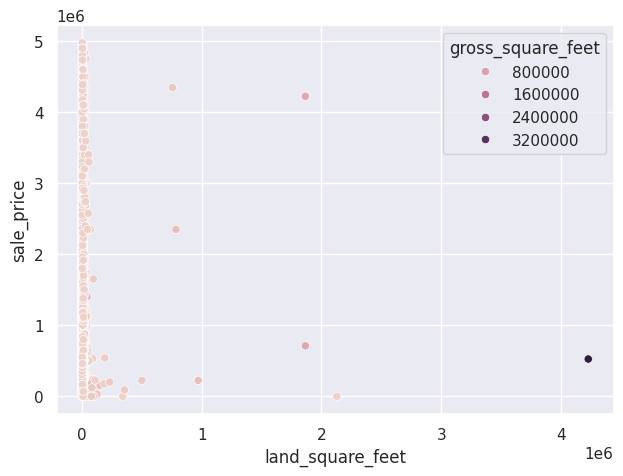

In [46]:
#quick plots of land_square_feet & gross_square_feet against price.
sns.scatterplot(data=new_df, x="land_square_feet", y="sale_price", hue = "gross_square_feet")

In [47]:
#remove duplicates
new_df.drop_duplicates()

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,111
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,...,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,104
172,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,391,19,,S3,624 EAST 9TH STREET,,...,1,4,1520.0,3360.0,1910,2,S3,3300000.0,2016-11-15,114
174,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,394,5,,S5,183 AVENUE B,,...,1,6,1779.0,3713.0,1910,2,S5,4750000.0,2017-04-03,114
195,Manhattan,ALPHABET CITY,22 STORE BUILDINGS,4,390,34,,K4,115 AVENUE C,,...,1,1,1218.0,3586.0,1899,4,K4,3700000.0,2016-09-28,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84541,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,126,,B2,112 ROBIN COURT,,...,0,2,11088.0,2160.0,1994,1,B2,648000.0,2016-12-07,30
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,...,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28,26
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,...,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21,26
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,...,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05,99


In [48]:
#check new df again
new_df.describe().apply(lambda s: s.apply('{0:.5f}'.format)).transpose()

,count,mean,std,min,25%,50%,75%,max
residential_units,28207.00000,2.17109,13.33397,0.00000,1.00000,2.00000,2.00000,1844.00000
commercial_units,28207.00000,0.20470,13.51836,0.00000,0.00000,0.00000,0.00000,2261.00000
total_units,28207.00000,2.37462,19.07034,0.00000,1.00000,2.00000,2.00000,2261.00000
land_square_feet,28207.00000,3814.92076,35284.42440,200.00000,2000.00000,2500.00000,3880.00000,4228300.00000
gross_square_feet,28207.00000,3106.44152,26358.64327,120.00000,1348.00000,1827.00000,2530.00000,3750565.00000
year_built,28207.00000,1941.18194,30.44789,1800.00000,1920.00000,1930.00000,1960.00000,2017.00000
sale_price,28207.00000,766102.58606,651702.65398,1.00000,410000.00000,600000.00000,900000.00000,4975000.00000
age,28207.00000,82.81806,30.44789,7.00000,64.00000,94.00000,104.00000,224.00000


<Axes: xlabel='sale_price', ylabel='Density'>

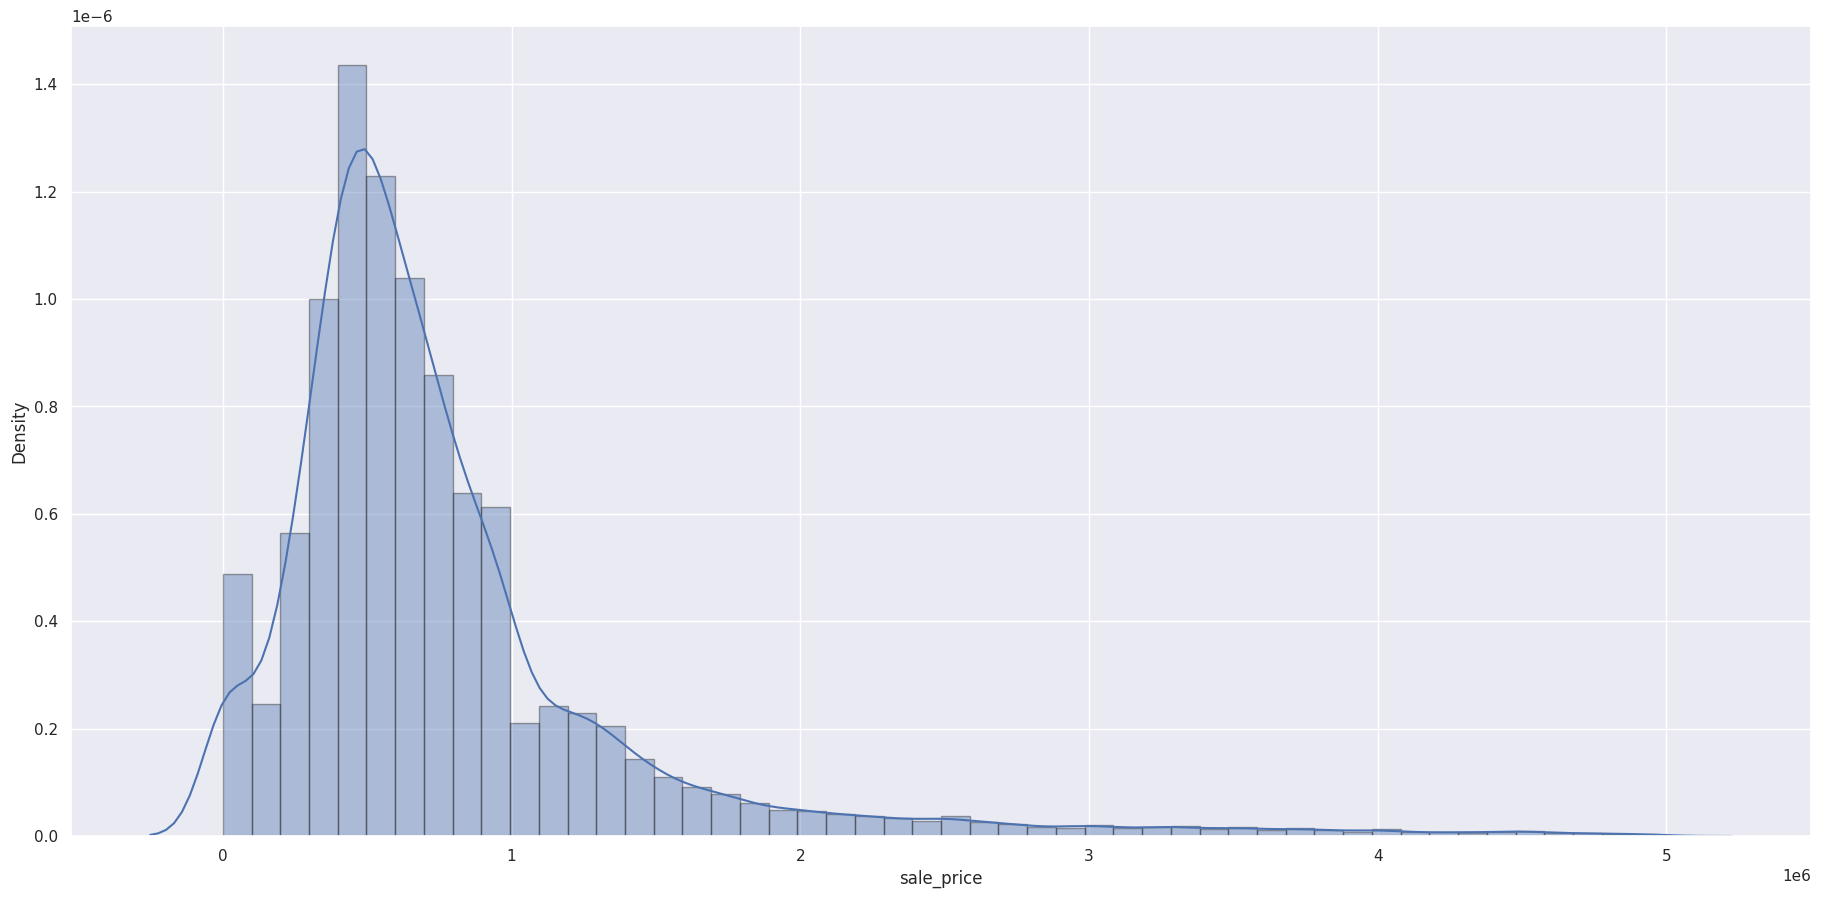

In [49]:
#create distribution plot of property sale prices
plt.figure(figsize = (20,10))
sns.distplot(new_df['sale_price'], kde = True, hist_kws=dict(edgecolor="k"))

In [50]:
#check datatypes
new_df.dtypes

borough                                   object
neighborhood                            category
building_class_category                 category
tax_class_at_present                    category
block                                   category
lot                                     category
ease-ment                               category
building_class_at_present               category
address                                 category
apartment_number                        category
zip_code                                category
residential_units                          int64
commercial_units                           int64
total_units                                int64
land_square_feet                         float64
gross_square_feet                        float64
year_built                                 int64
tax_class_at_time_of_sale               category
building_class_at_time_of_sale          category
sale_price                               float64
sale_date           

In [51]:
# Identify categorical features again
new_df.select_dtypes(['category']).columns

Index(['neighborhood', 'building_class_category', 'tax_class_at_present',
       'block', 'lot', 'ease-ment', 'building_class_at_present', 'address',
       'apartment_number', 'zip_code', 'tax_class_at_time_of_sale',
       'building_class_at_time_of_sale'],
      dtype='object')

Plots of Categorical Features VS. Sales Price

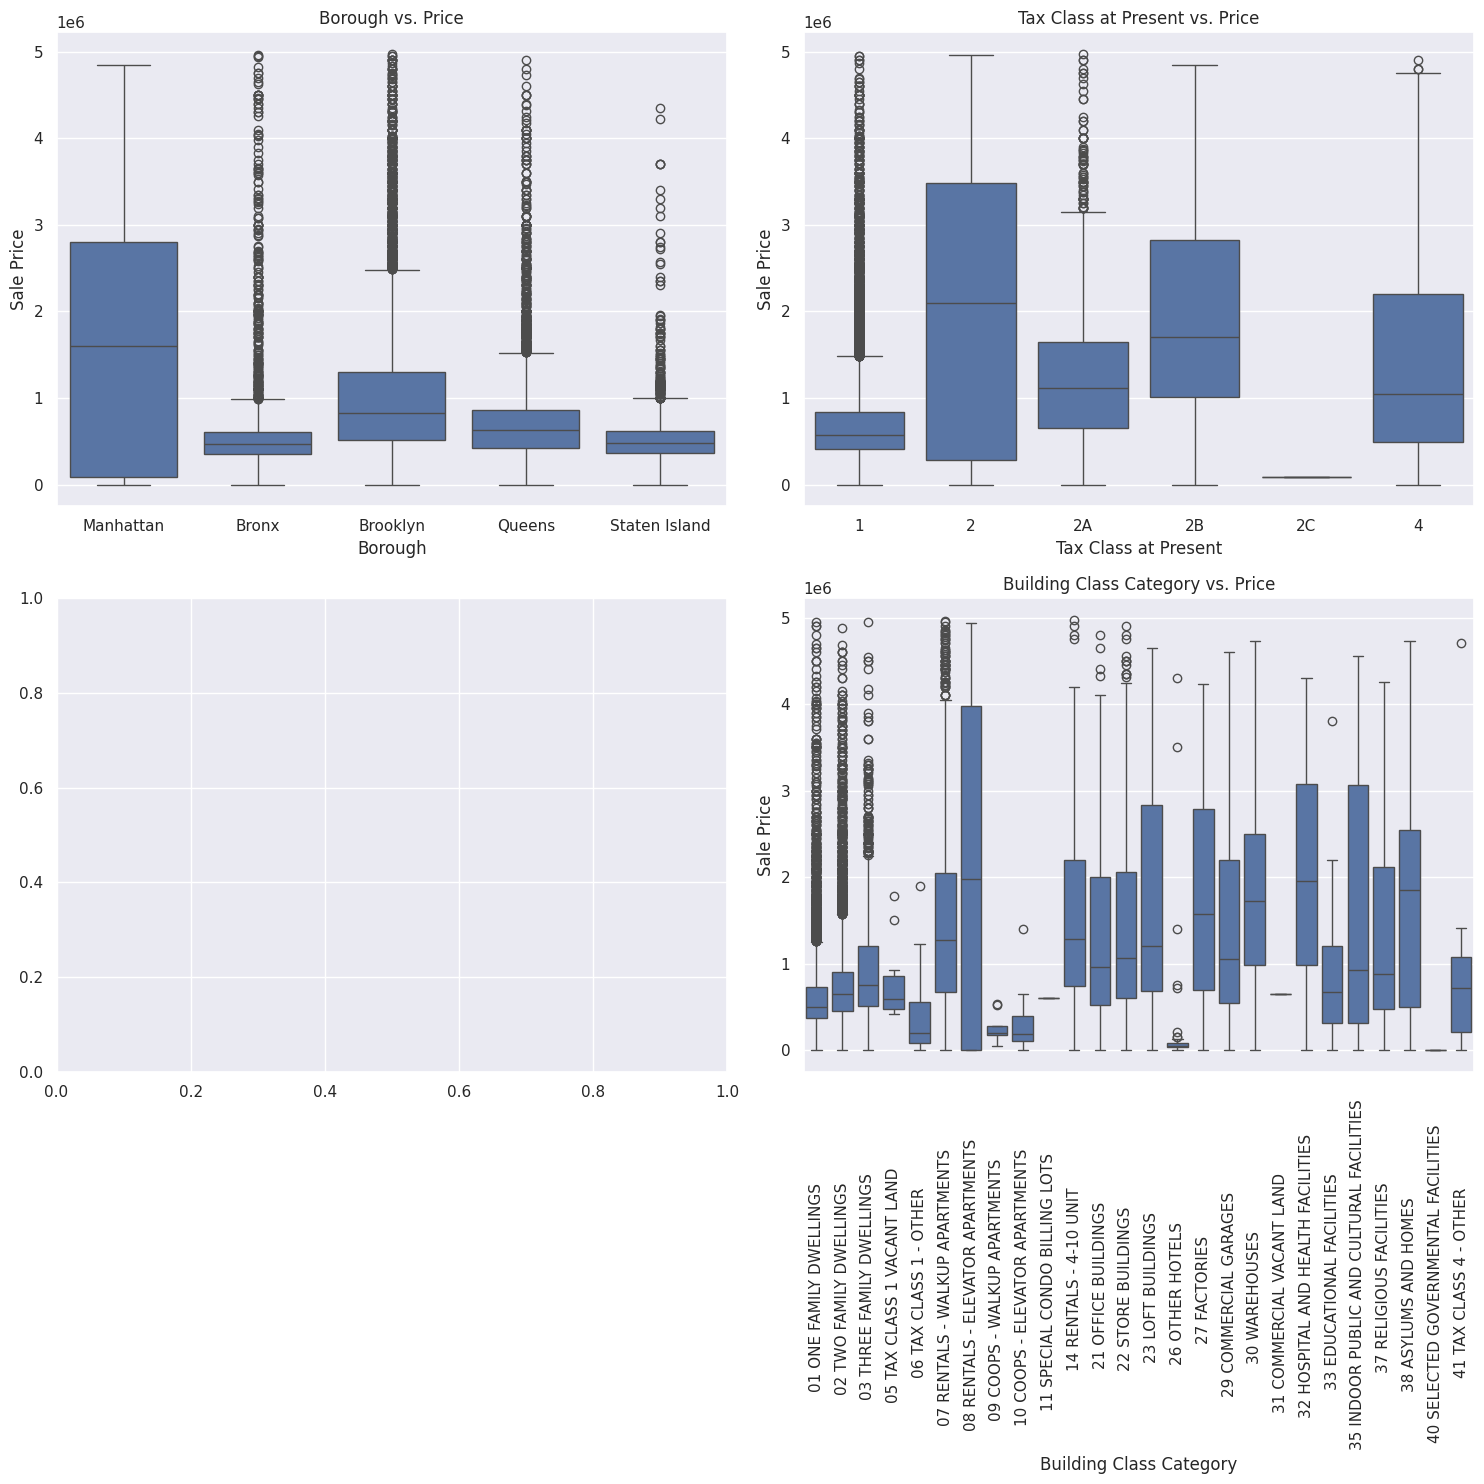

In [52]:
# Suplots of categorical features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize = (15,15))

#create order variable to plot unique values only
order_tax = sorted(new_df['tax_class_at_present'].unique())
order_class = sorted(new_df['building_class_category'].unique())


#plot of borough category vs price
sns.boxplot(x = 'borough', y = 'sale_price', data = new_df, ax = axes[0,0])
axes[0,0].set_xlabel('Borough')
axes[0,0].set_ylabel('Sale Price')
axes[0,0].set_title('Borough vs. Price')

#plot of tax class at present vs price
sns.boxplot(x = 'tax_class_at_present', y = 'sale_price', data = new_df, ax = axes[0,1], order = order_tax)
axes[0,1].set_xlabel('Tax Class at Present')
axes[0,1].set_ylabel('Sale Price')
axes[0,1].set_title('Tax Class at Present vs. Price')


#plot of building class categories vs price
sns.boxplot(x = 'building_class_category', y = 'sale_price', data = new_df, ax = axes[1,1], order = order_class)
axes[1,1].set_xlabel('Building Class Category')
axes[1,1].set_ylabel('Sale Price')
axes[1,1].set_title('Building Class Category vs. Price')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [53]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28207 entries, 3 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   borough                         28207 non-null  object        
 1   neighborhood                    28207 non-null  category      
 2   building_class_category         28207 non-null  category      
 3   tax_class_at_present            28207 non-null  category      
 4   block                           28207 non-null  category      
 5   lot                             28207 non-null  category      
 6   ease-ment                       28207 non-null  category      
 7   building_class_at_present       28207 non-null  category      
 8   address                         28207 non-null  category      
 9   apartment_number                28207 non-null  category      
 10  zip_code                        28207 non-null  category      
 11  re

In [54]:
df2 = new_df[(new_df['sale_price'] > 0) & (new_df['sale_price'] < 5000000)]

trace0 = go.Box(
    y=df2.sale_price[df2.borough == 'Manhattan' ],
    name = 'Manhattan',
    marker = dict(
        color = 'rgb(12, 12, 140)',
    )
)
trace1 = go.Box(
    y=df2.sale_price[df2.borough ==  'Bronx' ],
    name = 'Bronx',
    marker = dict(
        color = 'rgb(8,81,156)',
    )
)
trace2 = go.Box(
    y=df2.sale_price[df2.borough ==  'Brooklyn' ],
    name = 'Brooklyn',
    marker = dict(
        color = 'rgb(12, 12, 140)',
    )
)
trace3 = go.Box(
    y=df2.sale_price[df2.borough ==  'Queens' ],
    name = 'Queens',
    marker = dict(
        color = 'rgb(12, 128, 128)',
    )
)
trace4 = go.Box(
    y=df2.sale_price[df2.borough ==  'Staten Island' ],
    name = 'Staten Island',
    marker = dict(
        color = 'rgb(12, 12, 140)',
    )
)

dat = [trace0, trace1, trace2, trace3, trace4]
layout = go.Layout(
    title='df Prices by Boroughs',
    xaxis=dict(
        title='Borough'
    ),
    yaxis=dict(
        title='Sale Price'
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)'
)

fig = go.Figure(data=dat, layout=layout)
py.iplot(fig)

In [55]:
neighborhoods = list(dict(Counter(df2.neighborhood).most_common(10)).keys())

avg_sale_prices = []
for i in neighborhoods:
    avg_price = np.mean(df2.sale_price[df2.neighborhood == i])
    avg_sale_prices.append(avg_price)

dataa = [go.Bar(
            y= neighborhoods,
            x = avg_sale_prices,
            width = 0.7,
            opacity=0.6,
            orientation = 'h',
            marker=dict(
                color='rgb(158,202,225)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5,
                )
            ),
        )]
layout = go.Layout(
    title='House Price by Top 10 Neighborhoods',
    autosize = True,
    margin=go.Margin(
        l=250,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    xaxis=dict(
        title='Sale Price',
    ),
    yaxis=dict(
        title='Neighborhood',
    ),
)

fig = go.Figure(data=dataa, layout = layout)
py.iplot(fig, filename='barplottype')

/usr/local/lib/python3.10/dist-packages/plotly/graph_objs/_deprecations.py:405: DeprecationWarning:

plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin




In [56]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28207 entries, 3 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   borough                         28207 non-null  object        
 1   neighborhood                    28207 non-null  category      
 2   building_class_category         28207 non-null  category      
 3   tax_class_at_present            28207 non-null  category      
 4   block                           28207 non-null  category      
 5   lot                             28207 non-null  category      
 6   ease-ment                       28207 non-null  category      
 7   building_class_at_present       28207 non-null  category      
 8   address                         28207 non-null  category      
 9   apartment_number                28207 non-null  category      
 10  zip_code                        28207 non-null  category      
 11  re

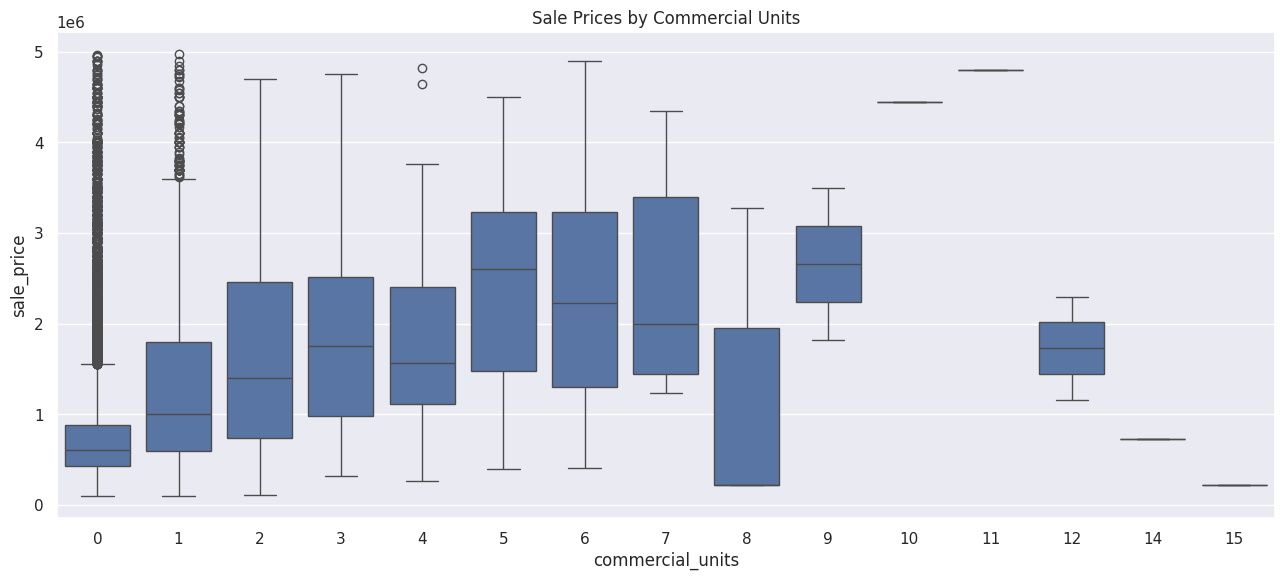

In [57]:
dataset = new_df[(new_df['commercial_units']<20) & (new_df['total_units']<50) & (new_df['sale_price']<5000000) & (new_df['sale_price']>100000) & (new_df['gross_square_feet']>0)]

plt.figure(figsize=(14,6))
sns.boxplot(x='commercial_units', y="sale_price", data=dataset)
plt.title('Sale Prices by Commercial Units');

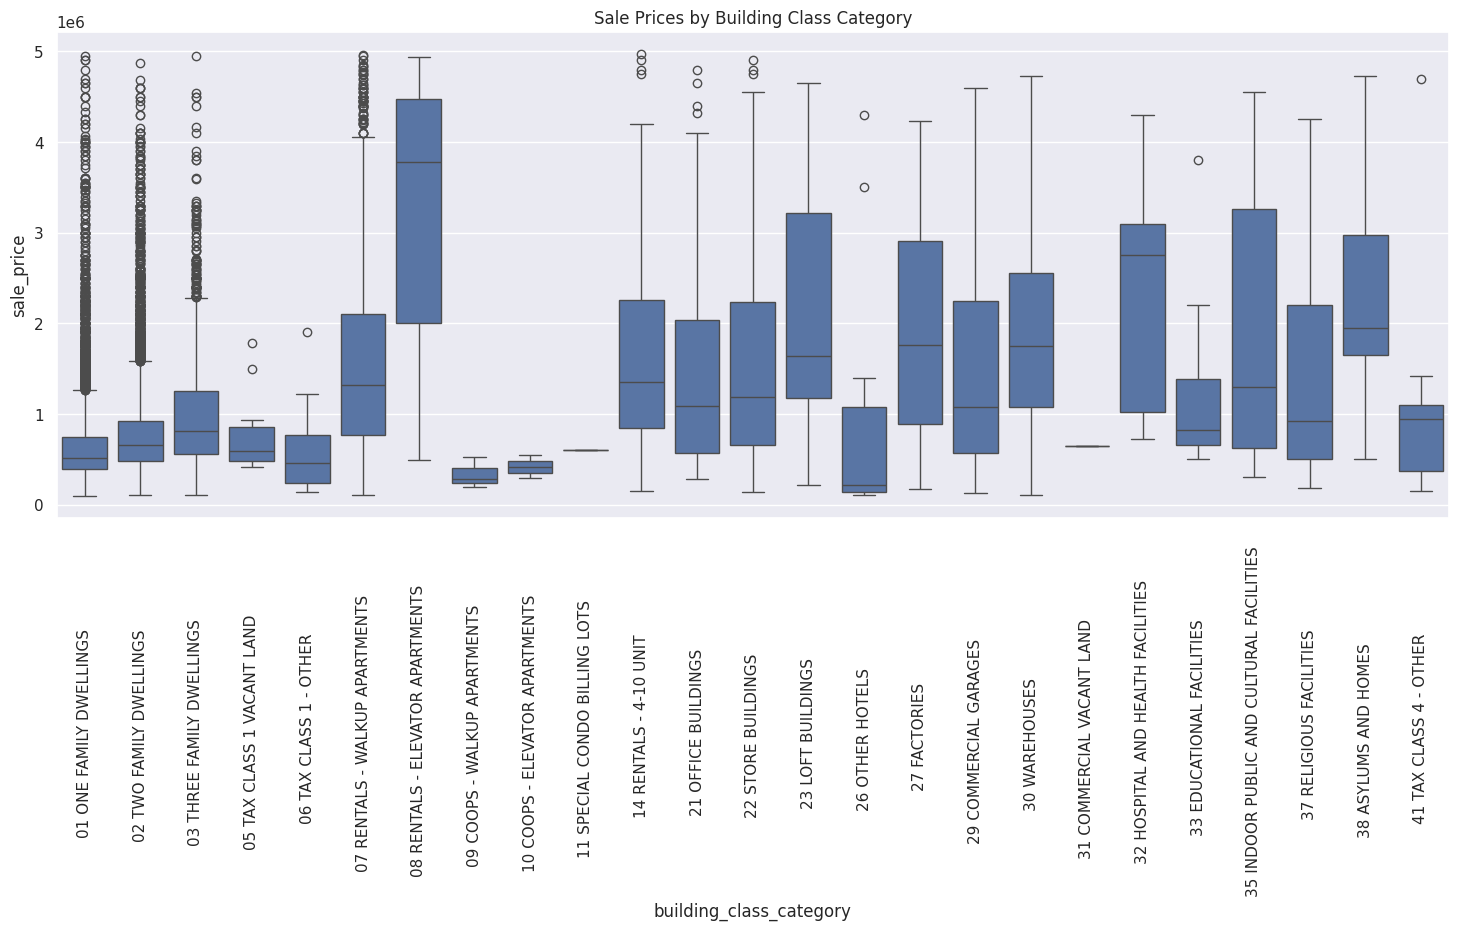

In [58]:
plt.figure(figsize=(16,6))
order = sorted(dataset['building_class_category'].unique())
sns.boxplot(x='building_class_category', y='sale_price', data=dataset, order=order)
plt.xticks(rotation=90)
plt.title('Sale Prices by Building Class Category')
plt.show()

In [59]:
d3 = pd.DataFrame(df2.groupby(['borough']).mean()).reset_index()
d3['borough'][d3.borough == 1] = 'Manhattan'
d3['borough'][d3.borough == 2] = 'Bronx'
d3['borough'][d3.borough == 3] = 'Brooklyn'
d3['borough'][d3.borough == 4] = 'Queens'
d3['borough'][d3.borough == 5] = 'Staten Island'
total = d3["land_square_feet"].sum()
trace0 = go.Scatter(
    x=d3.borough,
    y=d3["land_square_feet"],
    mode='markers',
    marker=dict(
        size=[((x/total)*300) for x in d3["land_square_feet"]],
        color=['rgb(93, 164, 214)', 'rgb(255, 144, 14)',  'rgb(44, 160, 101)', 'rgb(255, 65, 54)', 'rgb(255, 15, 54)'],
    )
)

data = [trace0]
layout = go.Layout(
    title='Average Land Square Feet of Properties in Each Borough',
    xaxis=dict(
        title='Borough',
        gridcolor='rgb(255, 255, 255)',
    ),
    yaxis=dict(
        title='Land square feet',
        gridcolor='rgb(255, 255, 255)',
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='bubblechart-size')

Plots of Numerical Features VS. Sales Price

In [60]:
new_df.dtypes

borough                                   object
neighborhood                            category
building_class_category                 category
tax_class_at_present                    category
block                                   category
lot                                     category
ease-ment                               category
building_class_at_present               category
address                                 category
apartment_number                        category
zip_code                                category
residential_units                          int64
commercial_units                           int64
total_units                                int64
land_square_feet                         float64
gross_square_feet                        float64
year_built                                 int64
tax_class_at_time_of_sale               category
building_class_at_time_of_sale          category
sale_price                               float64
sale_date           

Text(0.5, 1.0, 'Commercial Units vs Sale Price')

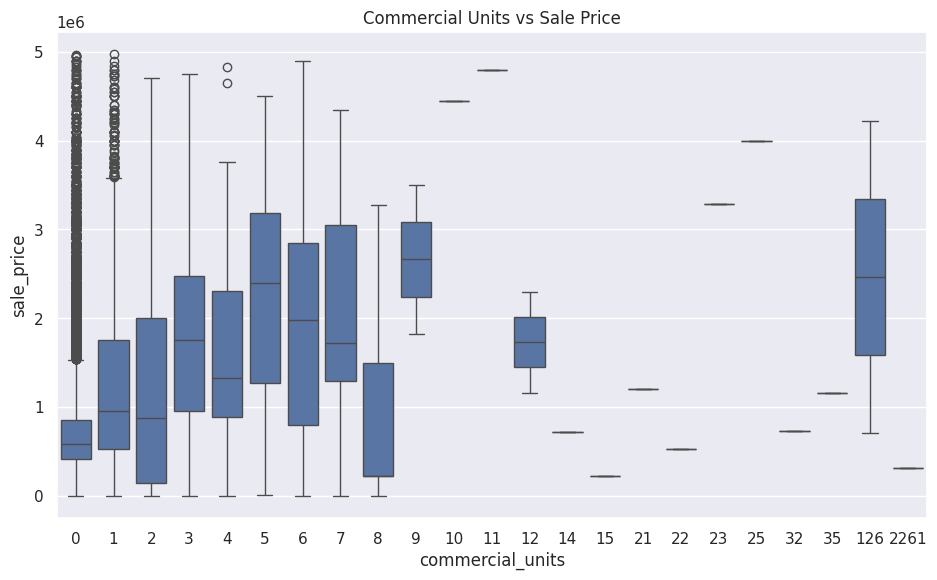

In [61]:
#plot commercial units
plt.figure(figsize=(10,6))
sns.boxplot(x='commercial_units', y="sale_price", data=new_df)
plt.title('Commercial Units vs Sale Price')

Text(0.5, 1.0, 'Age vs. Price')

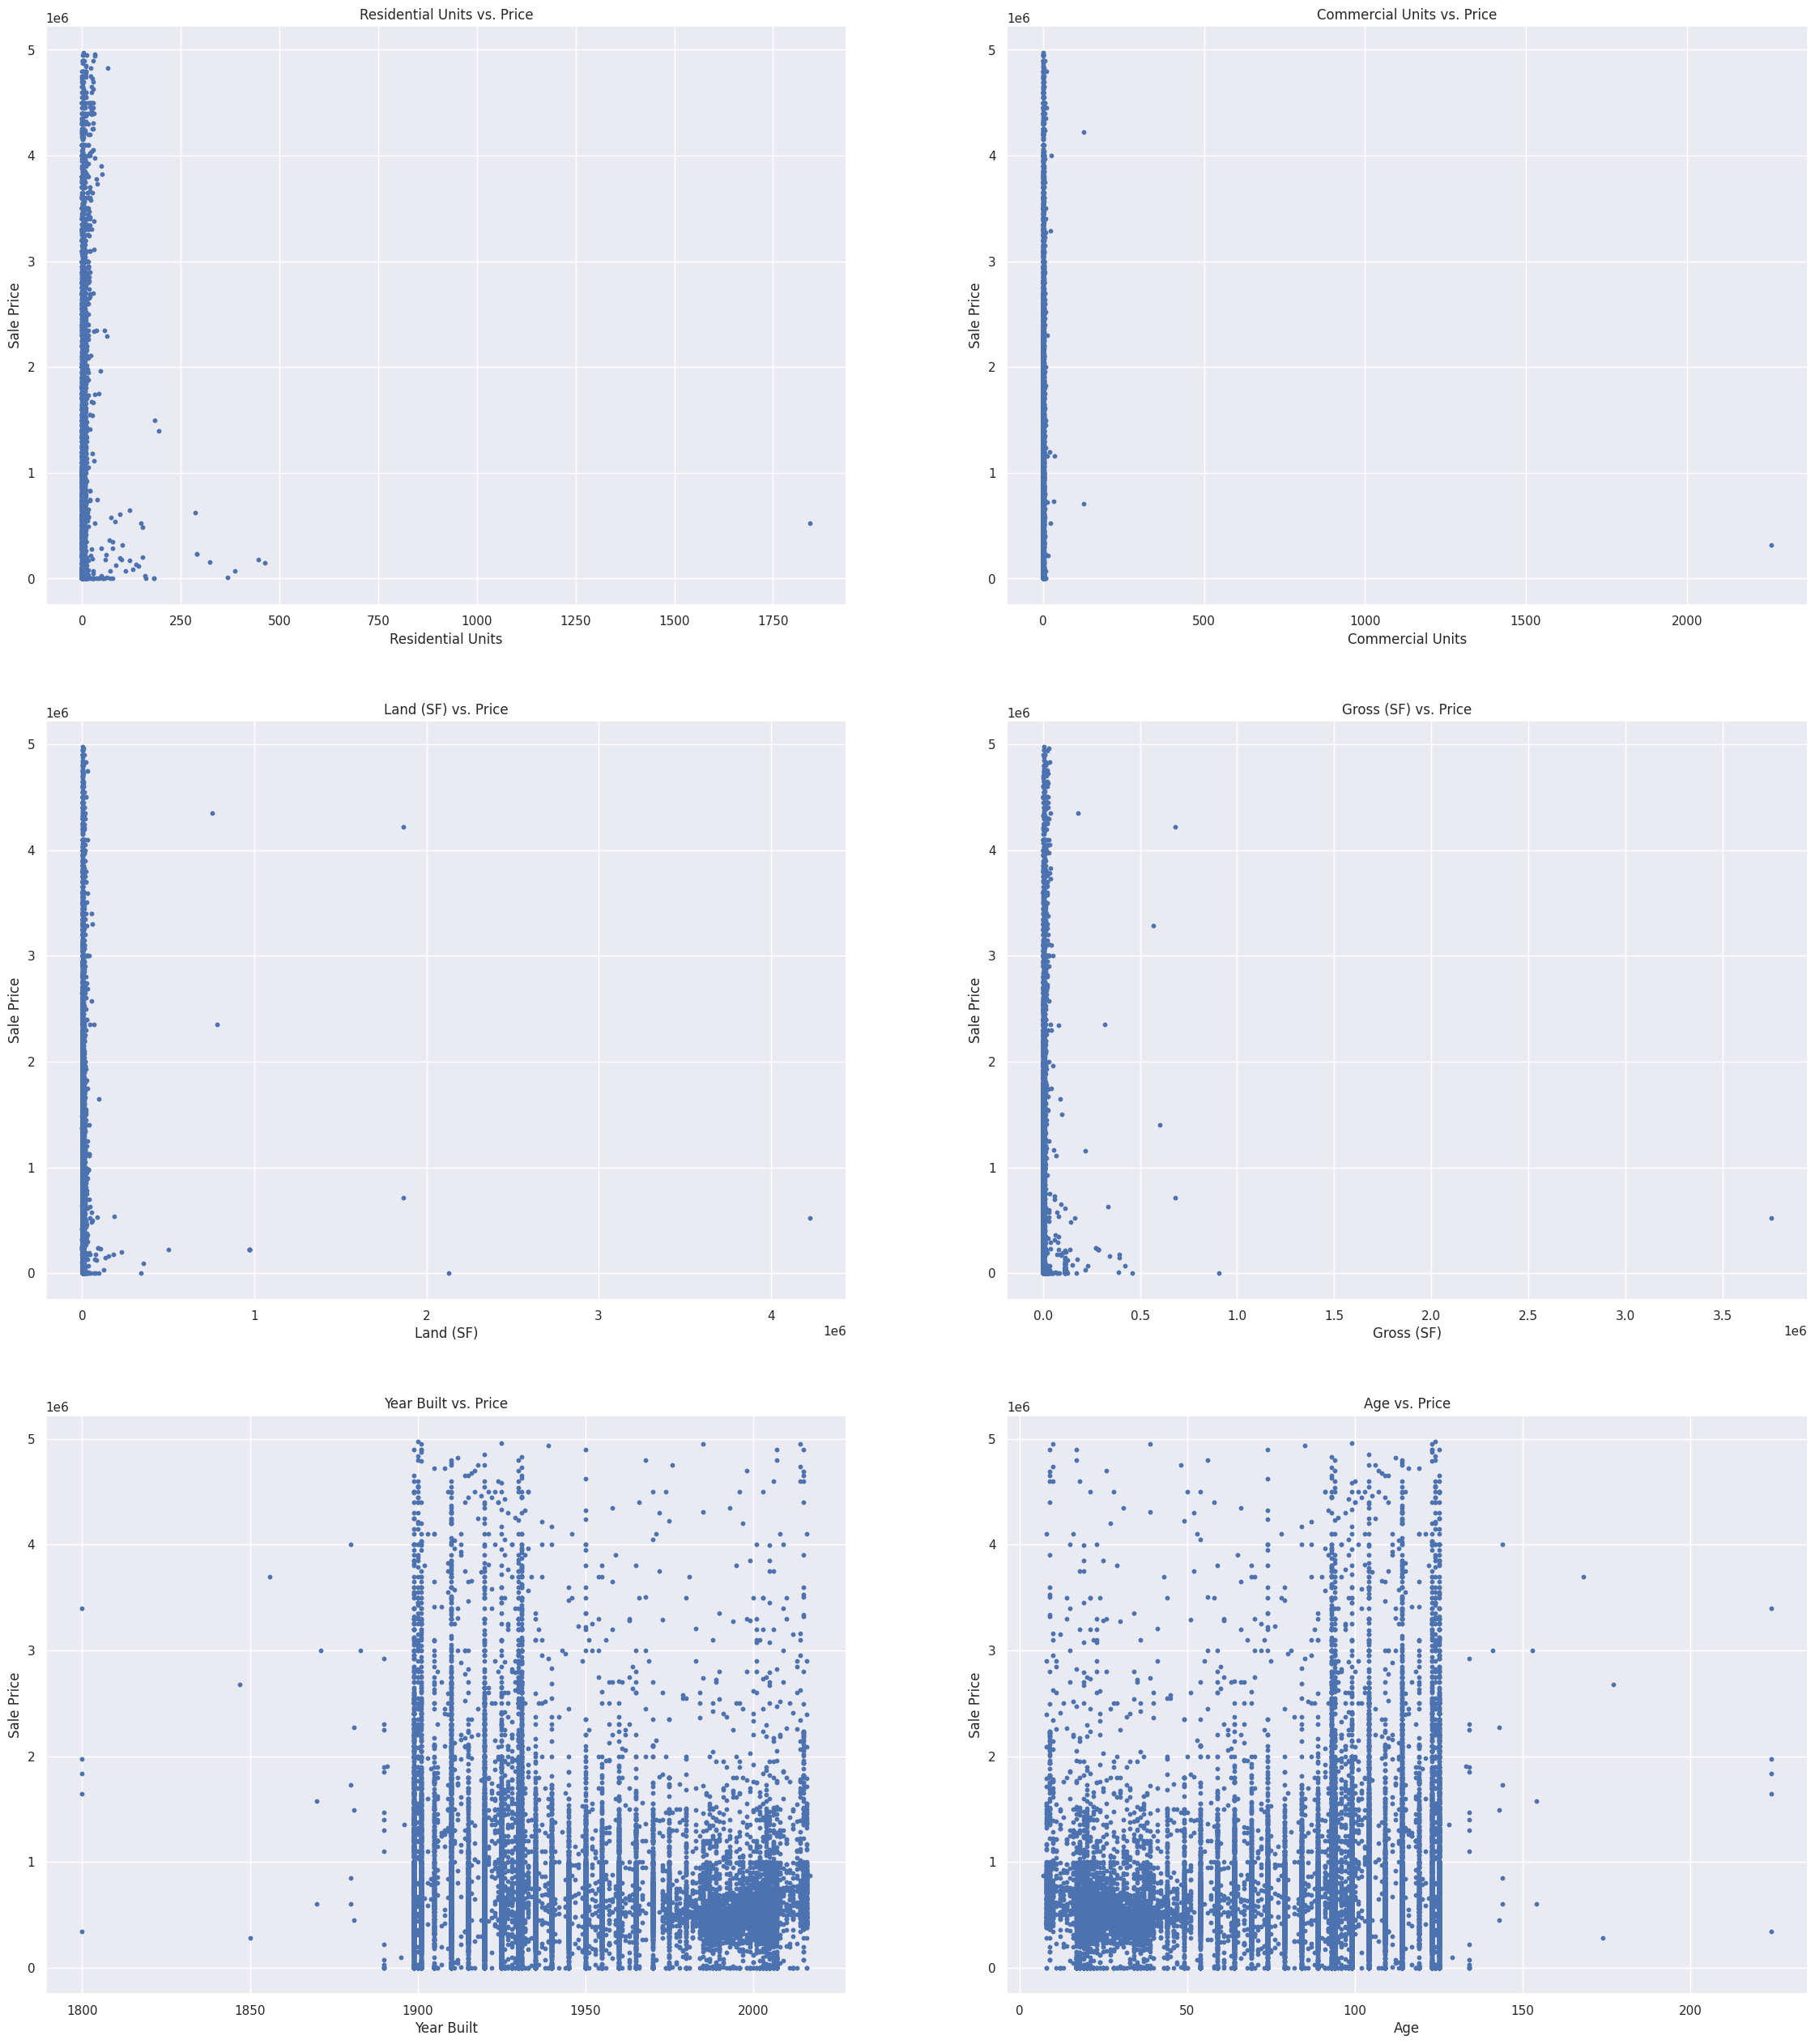

In [62]:
#Suplots of numeric features vs sales price
sns.set_style('darkgrid')
f, axes = plt.subplots(3,2, figsize = (25,30))

# Plot residential units
axes[0,0].scatter(x = 'residential_units', y = 'sale_price', data = new_df, edgecolor = 'b', s = 10)
axes[0,0].set_xlabel('Residential Units')
axes[0,0].set_ylabel('Sale Price')
axes[0,0].set_title('Residential Units vs. Price')

# Plot commercial units
axes[0,1].scatter(x = 'commercial_units', y = 'sale_price', data = new_df, edgecolor = 'b', s = 10)
axes[0,1].set_xlabel('Commercial Units')
axes[0,1].set_ylabel('Sale Price')
axes[0,1].set_title('Commercial Units vs. Price')
# Plot land square feet
axes[1,0].scatter(x = 'land_square_feet', y = 'sale_price', data = new_df, edgecolor = 'b', s = 10)
axes[1,0].set_xlabel('Land (SF)')
axes[1,0].set_ylabel('Sale Price')
axes[1,0].set_title('Land (SF) vs. Price')

# Plot gross square feet
axes[1,1].scatter(x = 'gross_square_feet', y = 'sale_price', data = new_df, edgecolor = 'b', s = 10)
axes[1,1].set_xlabel('Gross (SF)')
axes[1,1].set_ylabel('Sale Price')
axes[1,1].set_title('Gross (SF) vs. Price')
# Plot year built
axes[2,0].scatter(x = 'year_built', y = 'sale_price', data = new_df, edgecolor = 'b', s = 10)
axes[2,0].set_xlabel('Year Built')
axes[2,0].set_ylabel('Sale Price')
axes[2,0].set_title('Year Built vs. Price')

# Plot age
axes[2,1].scatter(x = 'age', y = 'sale_price', data = new_df, edgecolor = 'b', s = 10)
axes[2,1].set_xlabel('Age')
axes[2,1].set_ylabel('Sale Price')
axes[2,1].set_title('Age vs. Price')

Correlation

Text(0.5, 1.0, 'Variable Correlation')

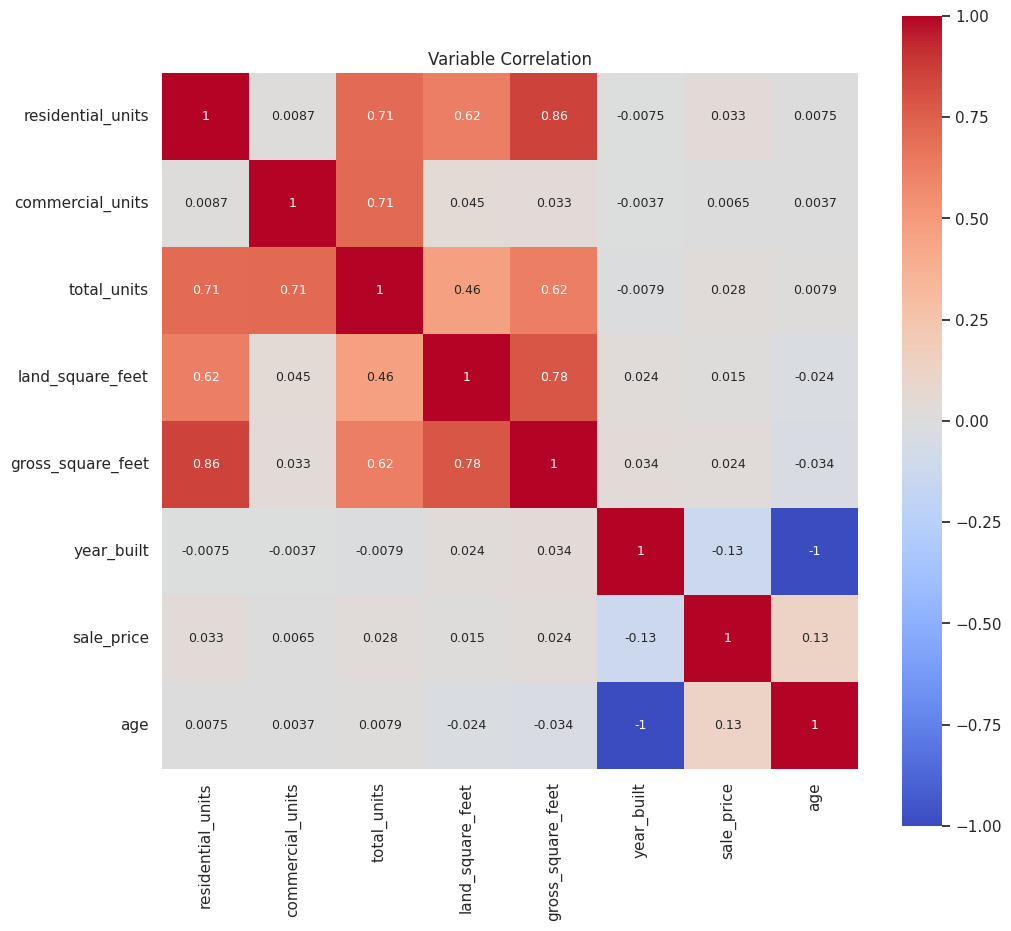

In [63]:
#correlation matrix
corrmat = new_df.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, cmap = 'coolwarm', square=True, annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')

In [64]:
mod_df = new_df

In [65]:
del mod_df['neighborhood']
del mod_df['lot']
del mod_df['ease-ment']
del mod_df['address']
del mod_df['apartment_number']
del mod_df['sale_date']
del mod_df['zip_code']
del mod_df['gross_square_feet']
del mod_df['year_built']
del mod_df['block']
del mod_df['building_class_at_present']
del mod_df['building_class_at_time_of_sale']
del mod_df['tax_class_at_present']
del mod_df['residential_units']

Text(0.5, 1.0, 'Variable Correlation')

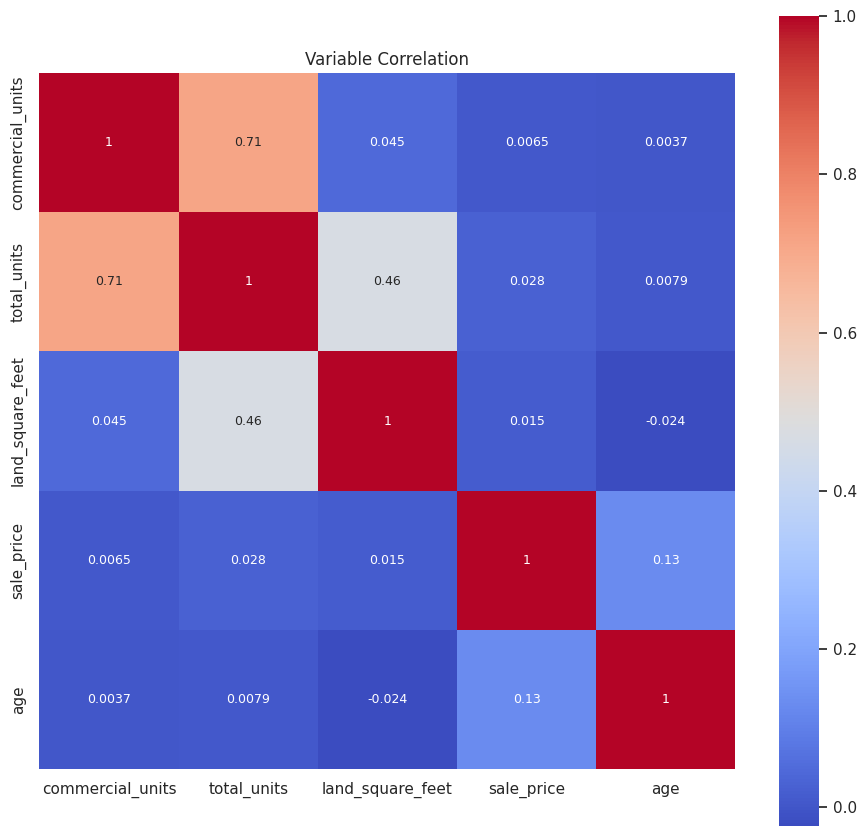

In [66]:
corrmat = mod_df.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, cmap = 'coolwarm', square=True, annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')

In [67]:
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28207 entries, 3 to 84547
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   borough                    28207 non-null  object  
 1   building_class_category    28207 non-null  category
 2   commercial_units           28207 non-null  int64   
 3   total_units                28207 non-null  int64   
 4   land_square_feet           28207 non-null  float64 
 5   tax_class_at_time_of_sale  28207 non-null  category
 6   sale_price                 28207 non-null  float64 
 7   age                        28207 non-null  int64   
dtypes: category(2), float64(2), int64(3), object(1)
memory usage: 1.6+ MB


In [68]:
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28207 entries, 3 to 84547
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   borough                    28207 non-null  object  
 1   building_class_category    28207 non-null  category
 2   commercial_units           28207 non-null  int64   
 3   total_units                28207 non-null  int64   
 4   land_square_feet           28207 non-null  float64 
 5   tax_class_at_time_of_sale  28207 non-null  category
 6   sale_price                 28207 non-null  float64 
 7   age                        28207 non-null  int64   
dtypes: category(2), float64(2), int64(3), object(1)
memory usage: 1.6+ MB


In [69]:
df.tax_class_at_time_of_sale = df.tax_class_at_time_of_sale.astype(object)
mod_df['borough'] = mod_df['borough'].astype('category')

In [70]:
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28207 entries, 3 to 84547
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   borough                    28207 non-null  category
 1   building_class_category    28207 non-null  category
 2   commercial_units           28207 non-null  int64   
 3   total_units                28207 non-null  int64   
 4   land_square_feet           28207 non-null  float64 
 5   tax_class_at_time_of_sale  28207 non-null  category
 6   sale_price                 28207 non-null  float64 
 7   age                        28207 non-null  int64   
dtypes: category(3), float64(2), int64(3)
memory usage: 1.4 MB


In [71]:
# One-hot encoding the categorical variable
df_encoded = pd.get_dummies(mod_df, columns=['tax_class_at_time_of_sale','building_class_category','borough'], drop_first=True)

print(df_encoded)


       commercial_units  total_units  land_square_feet  sale_price  age  \
3                     0           10            2272.0   3936272.0  111   
6                     0            8            1750.0   3192840.0  104   
172                   1            4            1520.0   3300000.0  114   
174                   1            6            1779.0   4750000.0  114   
195                   1            1            1218.0   3700000.0  125   
...                 ...          ...               ...         ...  ...   
84541                 0            2           11088.0    648000.0   30   
84543                 0            2            2400.0    450000.0   26   
84544                 0            2            2498.0    550000.0   26   
84545                 0            2            4000.0    460000.0   99   
84547                 1            1           10796.0     69300.0   18   

       tax_class_at_time_of_sale_2  tax_class_at_time_of_sale_3  \
3                               

In [72]:
from sklearn.linear_model import LinearRegression

X = df_encoded.drop('sale_price', axis=1)
y = df_encoded['sale_price']

# Splitting the dataset into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:

# Create linear regression object
regressor = LinearRegression()

# Fit model to training data
regressor.fit(X_train,y_train)

LinearRegression()

In [74]:
# Predicting test set results
y_pred = regressor.predict(X_test)

In [75]:
# Score It
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 338883.9734457689
MSE: 287008773662.697
RMSE: 535731.9979828505


Linear Regression

In [76]:
# Predicting test set results
y_pred = regressor.predict(X_test)

In [77]:
# Score It
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 338883.9734457689
MSE: 287008773662.697
RMSE: 535731.9979828505


In [78]:
# Calculated R Squared
print('R^2 =',metrics.explained_variance_score(y_test,y_pred))

R^2 = 0.26848997453462475


In [79]:
# Predict
# Predicting test set results
y_pred = regressor.predict(X_test)

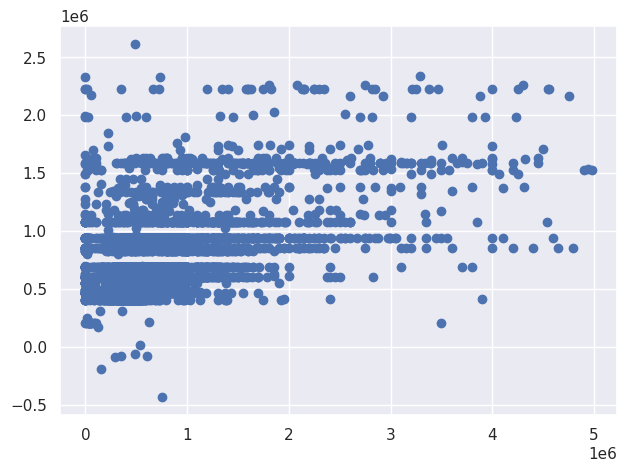

In [80]:
#Actual v predictions scatter
plt.scatter(y_test, y_pred)

<Axes: xlabel='sale_price', ylabel='Density'>

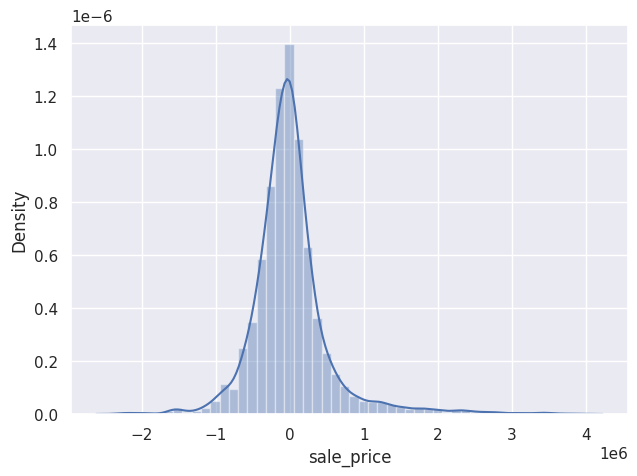

In [81]:
#Histogram of the distribution of residuals
sns.distplot((y_test - y_pred))

In [82]:
cdf = pd.DataFrame(data = regressor.coef_, index = X.columns, columns = ['Coefficients'])
cdf

,Coefficients
commercial_units,-2.702298e+02
total_units,1.753896e+02
land_square_feet,2.252469e-01
age,7.317312e+00
tax_class_at_time_of_sale_2,1.315063e+05
tax_class_at_time_of_sale_3,-2.677552e-08
tax_class_at_time_of_sale_4,4.620327e+05
building_class_category_02 TWO FAMILY DWELLINGS,8.437383e+04
building_class_category_03 THREE FAMILY DWELLINGS,2.200621e+05
building_class_category_04 TAX CLASS 1 CONDOS,9.364157e-09


In [83]:
# Popular Regression Algorithms

lm = LinearRegression()
lgbm = lightgbm.LGBMRegressor(random_state = 42)
mlp = MLPRegressor(random_state = 42)
ridge = Ridge(random_state = 42)
lasso = Lasso(random_state = 42)
knn = KNeighborsRegressor()
rf = RandomForestRegressor(random_state = 42)
xgbt = xgb.XGBRegressor(random_state = 42)
dtree = DecisionTreeRegressor(random_state = 42)

In [84]:
algo = [xgbt,lgbm,lm,ridge,lasso,knn,rf,dtree,mlp]
result = []

for i in algo:
        start = time.process_time()
        model = i.fit(X_train,y_train)
        result.append([str(i).split("(")[0] + str("_baseline"), model.score(X_train, y_train), model.score(X_test, y_test),
                  np.sqrt(mean_squared_error(y_train, model.predict(X_train))),
                  np.sqrt(mean_squared_error(y_test, model.predict(X_test))),
                  mean_absolute_error(y_train, model.predict(X_train)),
                  mean_absolute_error(y_test, model.predict(X_test))])
        print(str(i).split("(")[0],"✓    ", "{}".format(time.process_time()-start),"sn")

result_raw_model = pd.DataFrame(result, columns = ["Algorithm", "Train_Score", "Test_Score", "Train_Rmse",
                                         "Test_Rmse", "Train_Mae", "Test_Mae"]).sort_values("Test_Rmse").set_index("Algorithm")
result_raw_model

XGBRegressor ✓     1.6373851649999978 sn
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003934 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 475
[LightGBM] [Info] Number of data points in the train set: 22565, number of used features: 23
[LightGBM] [Info] Start training from score 766253.047374
LGBMRegressor ✓     0.8541232210000018 sn
LinearRegression ✓     0.17037746100000106 sn
Ridge ✓     0.17685403699999824 sn
Lasso ✓     3.143509360000003 sn
KNeighborsRegressor ✓     26.056434255 sn
RandomForestRegressor ✓     9.758355201 sn
DecisionTreeRegressor ✓     0.1500981549999949 sn
MLPRegressor ✓     82.63004566199999 sn


,Train_Score,Test_Score,Train_Rmse,Test_Rmse,Train_Mae,Test_Mae
Algorithm,,,,,,
LGBMRegressor_baseline,0.498883,0.389286,465708.969976,489472.019267,296095.403125,299581.076592
XGBRegressor_baseline,0.612438,0.359387,409558.156219,501310.706631,266280.546138,302773.954850
RandomForestRegressor_baseline,0.795933,0.329289,297187.737830,512952.077432,180642.070959,312408.880522
LinearRegression_baseline,0.250227,0.268394,569652.165695,535731.997983,357133.243261,338883.973446
Lasso_baseline,0.250227,0.268383,569652.249753,535736.244498,357136.880374,338887.824602
Ridge_baseline,0.250060,0.268308,569715.596821,535763.759219,357266.849853,338979.480481
KNeighborsRegressor_baseline,0.382070,0.067532,517147.806626,604819.838338,324261.377381,377127.127685
DecisionTreeRegressor_baseline,0.860009,0.007851,246147.170283,623874.747574,108860.986742,363898.952142
MLPRegressor_baseline,-0.053034,-0.043064,675096.823216,639682.583796,443509.825913,423340.588704
